In [3]:
import pandas as pd

# Load  dataset
df = pd.read_csv(r"C:\Users\atanu\OneDrive\Desktop\data science assignment\blogs (1).csv")
df.columns = ['Data', 'Labels']  # Ensure correct column naming

df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [4]:
print(df.head())
print(df['Labels'].value_counts())

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     

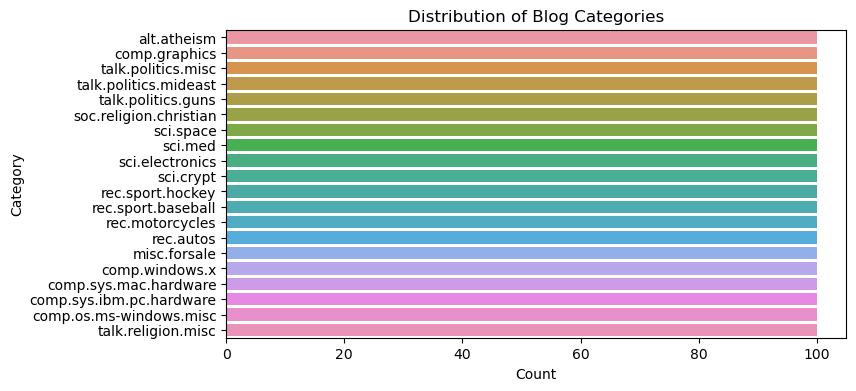

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='Labels', order=df['Labels'].value_counts().index)
plt.title("Distribution of Blog Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

In [9]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = re.sub(r'[^a-zA-Z]', ' ', str(text))  # Remove punctuation & numbers
    text = text.lower()
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['Cleaned'] = df['Data'].apply(preprocess)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\atanu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Data,Labels,Cleaned
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloup srv cs cmu edu magnesium club c...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroup alt atheism path cantaloup srv cs cm...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloup srv cs cmu edu da news harvard ...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloup srv cs cmu edu magnesium club c...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloup srv cs cmu edu alt atheism talk...
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,xref cantaloup srv cs cmu edu talk abort alt a...
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloup srv cs cmu edu talk religion mi...
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,xref cantaloup srv cs cmu edu talk origin talk...
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloup srv cs cmu edu talk religion mi...


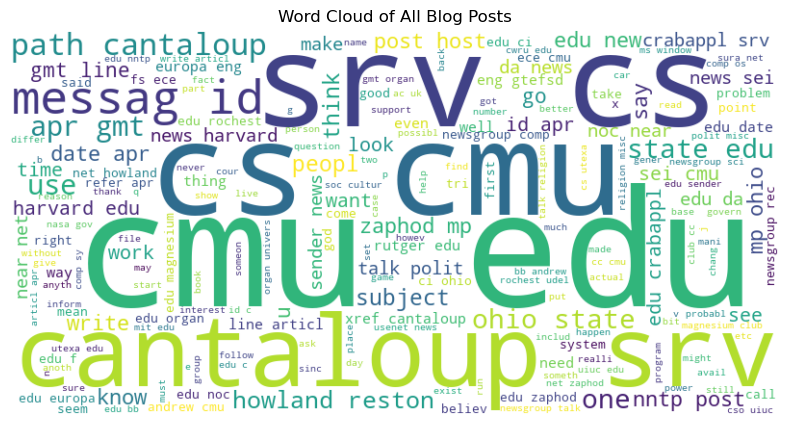

In [7]:
from wordcloud import WordCloud

text = " ".join(df['Cleaned'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of All Blog Posts")
plt.show()


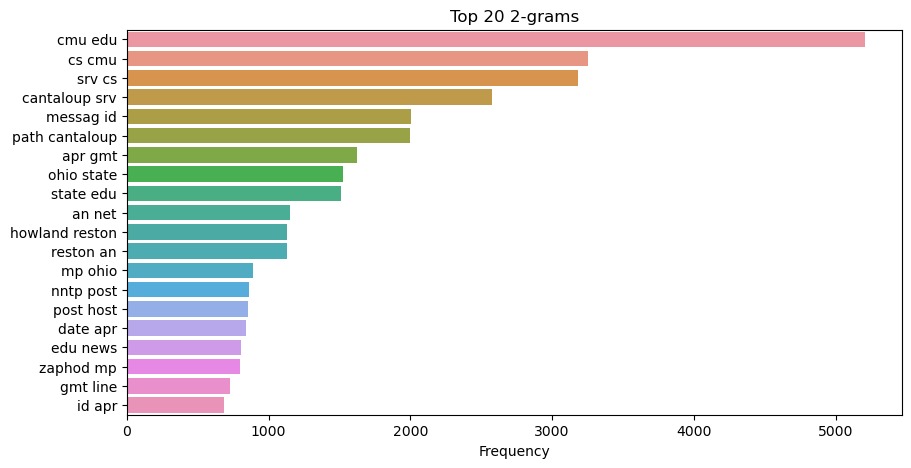

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_ngrams(text, n=2, top_k=20):
    vec = CountVectorizer(ngram_range=(n, n)).fit(text)
    bow = vec.transform(text)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_k]

    x, y = zip(*words_freq)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(y), y=list(x))
    plt.title(f"Top {top_k} {n}-grams")
    plt.xlabel("Frequency")
    plt.show()

plot_ngrams(df['Cleaned'], n=2)  # Bigrams


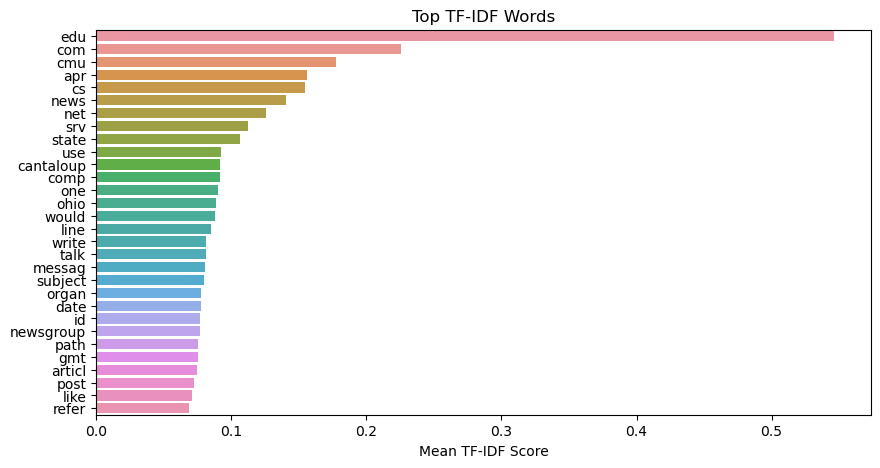

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=30)
X_tfidf = tfidf.fit_transform(df['Cleaned'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Plot top TF-IDF words
tfidf_mean = tfidf_df.mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=tfidf_mean.values, y=tfidf_mean.index)
plt.title("Top TF-IDF Words")
plt.xlabel("Mean TF-IDF Score")
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df['Cleaned'], df['Labels'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))


                          precision    recall  f1-score   support

             alt.atheism       0.58      0.83      0.68        18
           comp.graphics       0.82      0.78      0.80        18
 comp.os.ms-windows.misc       0.70      0.95      0.81        22
comp.sys.ibm.pc.hardware       0.71      0.80      0.75        25
   comp.sys.mac.hardware       0.76      0.62      0.68        21
          comp.windows.x       1.00      0.28      0.44        25
            misc.forsale       0.79      0.83      0.81        18
               rec.autos       0.84      0.89      0.86        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.89      0.89      0.89        18
        rec.sport.hockey       0.71      1.00      0.83        15
               sci.crypt       0.68      1.00      0.81        19
         sci.electronics       0.79      0.69      0.73        16
                 sci.med       0.88      0.88      0.88        17
         

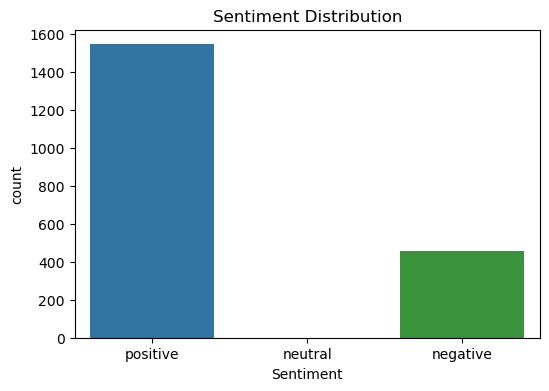

In [13]:
from textblob import TextBlob

df['Polarity'] = df['Data'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['Sentiment'] = df['Polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sentiment', order=['positive', 'neutral', 'negative'])
plt.title("Sentiment Distribution")
plt.show()


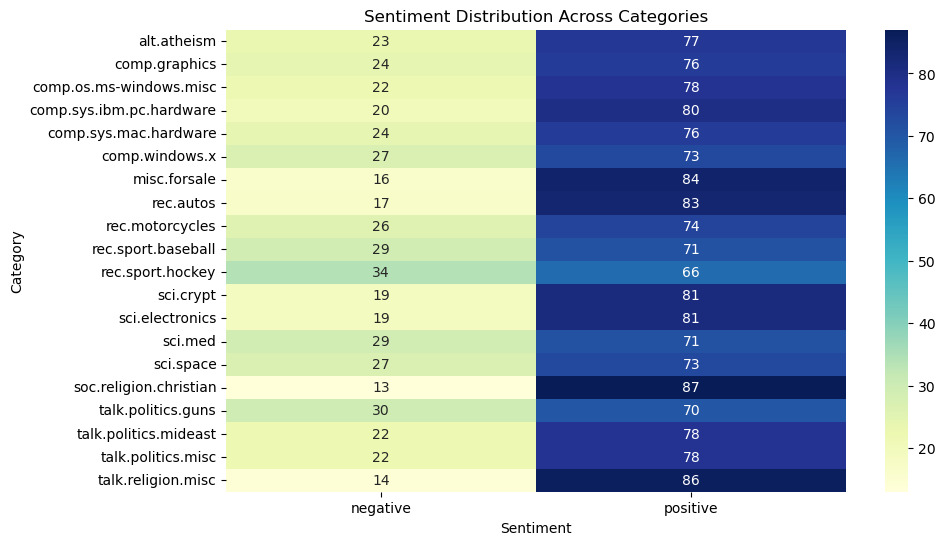

In [14]:
sentiment_counts = pd.crosstab(df['Labels'], df['Sentiment'])

plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Sentiment Distribution Across Categories")
plt.ylabel("Category")
plt.xlabel("Sentiment")
plt.show()
